In [1]:
from keras.datasets import mnist
import seaborn as sb
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [35]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [47]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(32,(3, 3),input_shape=(28,28,1),activation='relu'))#layer 1 with kernel size is 3x3 input size is 28x28
model.add(MaxPooling2D(pool_size=(2, 2)))# reducing the outputs of layer 1 by using pool of size 2x2
model.add(Conv2D(64, (3, 3), activation='relu'))#layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))# dropping out some of the inputs
model.add(Flatten())# flaatening the outputs of layer2 to make each output as different input for next layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])#using accuracy to update different parameters of the model

In [48]:
model.fit(xtrain, ytrain,batch_size=10,epochs=10,verbose=0,validation_data=(xtest, ytest))

In [89]:
score = model.evaluate(xtest, ytest)

10000/10000 [==============================] - 2s 165us/step


In [95]:
print("Accuracy of the model is {}%".format(round((score[1]*100),3)))

Accuracy of the model is 97.94%


In [91]:
pd.to_pickle(model,'CNN_digit_classifier')# saving model as a pickle file

In [86]:
from tkinter import *
import os
from PIL import Image,ImageFilter,ImageDraw
import matplotlib.pyplot as plt
class windw:
    def __init__(self,model):
        self.prediction_txt = 'Prediction:         '
        self.root = Tk()
        self.root.resizable(False, False)  
        self.CANVAS_WIDTH = 280
        self.CANVAS_HEIGHT = 280
        self.model =model

        # Clear drawing button
        self.clear_button = Button(self.root, text='Clear', command=self.clear)
        self.clear_button.grid(row=0, column=0)

        # Predicted number label
        self.predicted_num_label =  Label(self.root, text=self.prediction_txt, anchor='w')
        self.predicted_num_label.grid(row=0, column=1, columnspan=4,  sticky='nsew')

        self.canvas = Canvas(self.root, bg='white', width=self.CANVAS_WIDTH, height=self.CANVAS_HEIGHT)
        self.canvas.grid(row=1, columnspan=5)
        self.image=Image.new("RGB",(280,280),(255,255,255))# setting image size as 280x280 and black(255,255,255) bg
        self.draw=ImageDraw.Draw(self.image)
        self.setup()
        self.root.mainloop()

    def setup(self):
        self.old_x = None #reseting last mouse location's x-cordinate
        self.old_y = None #reseting last mouse location's y-cordinate
        self.canvas.bind('<B1-Motion>', self.write_num)#binding left mouse button to call function write_num()
        self.canvas.bind('<ButtonRelease-1>', self.reset)#binding left mouse button release to call function write_num()

    def clear(self):
        self.canvas.delete('all')# clearing the canvas
        self.old_x = None#reseting last mouse location's x-cordinate
        self.old_y = None#reseting last mouse location's y-cordinate
        self.image=Image.new("RGB",(280,280),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)
        self.predicted_num_label['text'] = self.prediction_txt


    def reset(self, event):
        self.old_x = None
        self.old_y = None
        arr = self.canvas_to_array()
        ar1=self.model.predict([arr])[0]
        v=0
        for i in range(len(ar1)):# finding digit with maximum accuracy value
            if ar1[i]==max(ar1):
                v=i
                break
        print(v)
        txt ='Predicted : {}'.format(v)#self.model.predict([arr])[0])
        self.predicted_num_label['text'] = txt
        
    def write_num(self, event):
        self.line_width = 20
        w_color = 'black'
        if self.old_x and self.old_y:
            self.canvas.create_line(self.old_x, self.old_y, event.x, event.y,width=self.line_width, fill=w_color,capstyle=ROUND,smooth=TRUE, splinesteps=36)
            self.draw.line(((self.old_x,self.old_y),(event.x,event.y)),(0,128,0),width=25)
        self.old_x = event.x#seting present mouse location's x-cordinate
        self.old_y = event.y#seting present mouse location's y-cordinate

    def canvas_to_array(self):# converting canvas image to array
        try:
            os.remove('cnv.jpg')
        except:
            pass
        self.image.save('cnv.jpg')
        img = Image.open('cnv.jpg').convert('L')
        img = img.resize((28, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        arr = np.array(img)
        arr = np.array([(255 - x) for x in arr])
        plt.imshow(arr,cmap='binary')
        arr=arr.reshape(1,28,28,1)
        plt.show()
        return arr

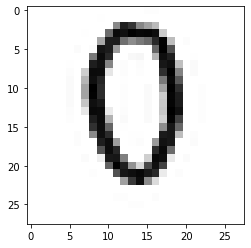

0


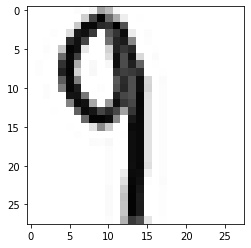

1


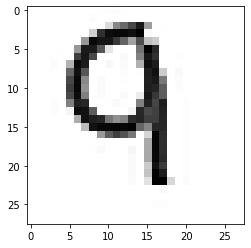

4


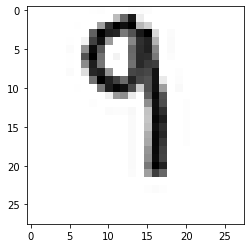

2


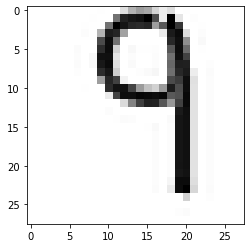

7


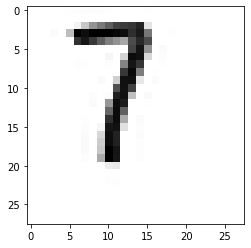

3


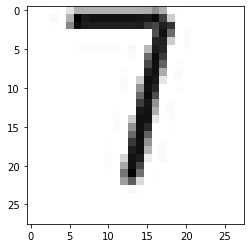

3


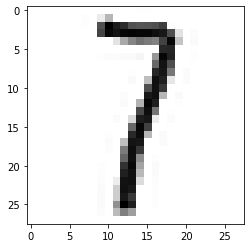

2


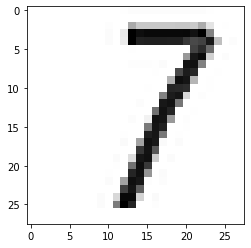

7


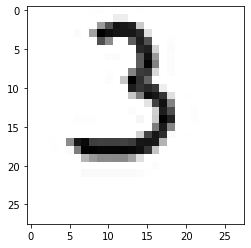

3


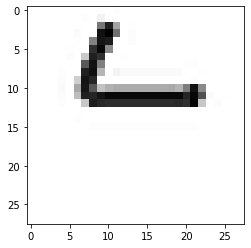

8


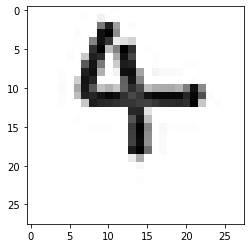

5


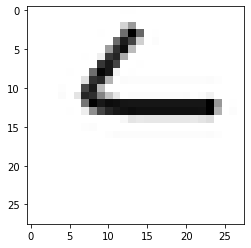

5


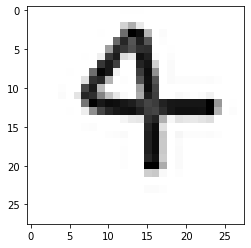

8


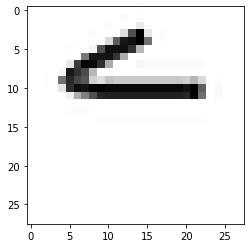

5


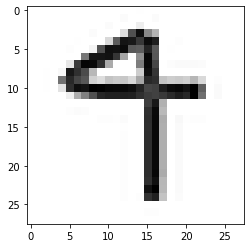

8


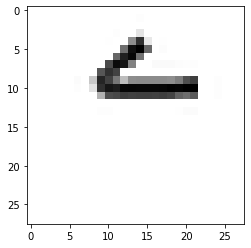

5


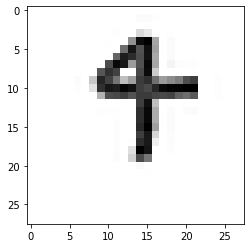

3


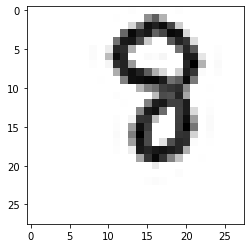

3


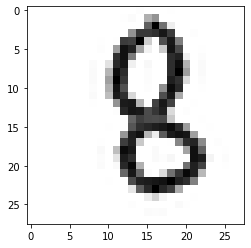

8


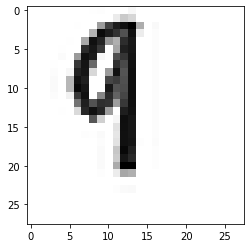

1


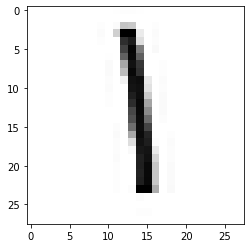

1


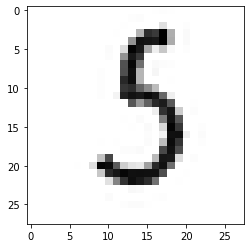

5


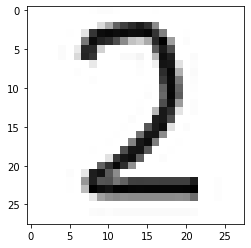

2


In [96]:
o=windw(model)